# Linear Discriminant Analysis with both continuous and categories variables (DISMIX)

In [1]:
# Chargement des librairies
import numpy as np 
import pandas as pd

In [2]:
# Chargement des données
D = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AFDM_TENNIS",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Djokovic,188,droitier,deux,79,34,17,vainqueur,114
Edberg,187,droitier,une,41,36,6,finale,1
Federer,185,droitier,une,103,54,20,vainqueur,24
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4


In [3]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Agassi to Wilander
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taille           20 non-null     int64 
 1   Lateralite       20 non-null     object
 2   MainsRevers      20 non-null     object
 3   Titres           20 non-null     int64 
 4   Finales          20 non-null     int64 
 5   TitresGC         20 non-null     int64 
 6   RolandGarros     20 non-null     object
 7   BestClassDouble  20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


on souhaite prédire `RolandGarros`

In [4]:
# Importation de la classe de Calcul
from scientisttools.discriminant_analysis import DISMIX

In [5]:
# Instanciation
mixdisc = DISMIX(n_components=None,
                  target=["RolandGarros"],
                  quanti_features_labels=["Taille","Titres","Finales","TitresGC","BestClassDouble"],
                  quali_features_labels=["Lateralite","MainsRevers"],
                  row_labels=D.index,
                  priors=None)

# Entrainement - Fit
mixdisc.fit(D)

DISMIX(quali_features_labels=['Lateralite', 'MainsRevers'],
       quanti_features_labels=['Taille', 'Titres', 'Finales', 'TitresGC',
                               'BestClassDouble'],
       row_labels=Index(['Agassi', 'Becker', 'Borg', 'Connors', 'Courier', 'Djokovic', 'Edberg',
       'Federer', 'Kafelnikov', 'Kuerten', 'Lendl', 'McEnroe', 'Murray',
       'Nadal', 'Nastase', 'Rafter', 'Safin', 'Sampras', 'Vilas', 'Wilander'],
      dtype='object', name='Joueur'),
       target=['RolandGarros'])

## Factor Analysis of Mixed Data

In [6]:
# FAMD
famd = mixdisc.famd_model_


In [7]:
# Valeur propres
eig = famd.eig_.T
display(pd.DataFrame(eig))

,0,1,2,3
0,3.052105,1.655115,43.601504,43.601504
1,1.396991,0.334178,19.957008,63.558512
2,1.062813,0.344955,15.183042,78.741554
3,0.717858,0.344921,10.255120,88.996675
4,0.372938,0.032000,5.327683,94.324358
5,0.340938,0.284581,4.870545,99.194903
6,0.056357,0.056357,0.805097,100.000000


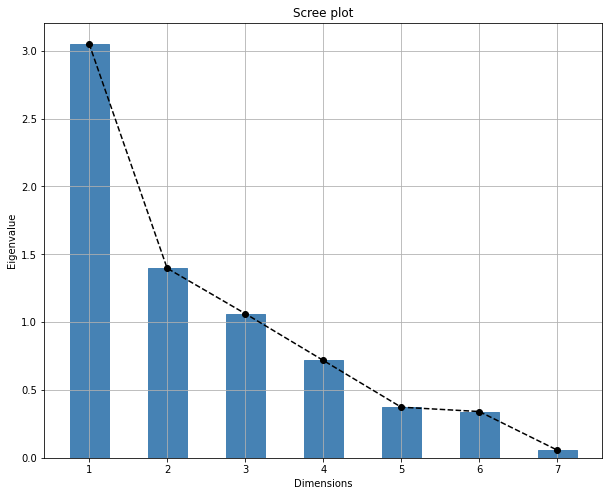

In [8]:
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt

fig, axe =plt.subplots(figsize=(10,8))
plot_eigenvalues(famd,choice="eigenvalue",ax=axe)
plt.show()

In [9]:
# Coordonnées des individus
pd.DataFrame(famd.row_coord_)

,0,1,2,3,4,5,6
0,-0.380686,-0.964081,0.078467,-0.106937,0.830249,-0.900920,0.203247
1,1.089407,1.212790,0.305663,-0.325306,-0.312247,0.703330,0.007251
2,-1.265452,-3.496562,0.276063,-2.019215,-0.826089,0.327078,-0.066909
3,-3.479658,-1.296227,-0.876927,0.654768,0.606017,0.716699,0.114161
4,1.794557,-0.914695,-0.117700,0.497172,0.253942,-0.707134,0.115922
5,-0.784877,-0.219781,2.117550,0.262233,-0.085526,-0.137544,0.061391
6,0.581733,1.141827,-0.155564,-0.539684,0.193646,0.192330,-0.503535
7,-2.431159,1.778095,1.664756,-0.789844,0.025671,-0.253256,-0.197805
8,2.062252,-0.469299,0.283449,0.697881,0.502026,0.374218,-0.081110
9,2.451544,0.509465,-0.435098,-0.313753,-0.943988,0.180529,0.177108


In [10]:
# Coefficients issus de LDA
mixdisc.lda_coef_

,demi,finale,vainqueur
Z1,0.156909,0.099737,-0.090313
Z2,0.097946,0.366905,-0.132537
Z3,-0.147749,-0.418917,0.166291
Z4,0.026316,0.420204,-0.116016
Z5,-0.558811,-0.087976,0.254832
Z6,0.520520,0.753650,-0.405296
Z7,0.693308,1.279948,-0.608865


In [11]:
# Constante issue de LDA
mixdisc.intercept_

,demi,finale,vainqueur
Intercept,-1.550004,-2.27729,-0.596078


In [12]:
# Coefficients du MIXDISC
mixdisc.coef_

,demi,finale,vainqueur
Taille,0.090270,0.091352,-0.060451
Titres,0.099047,0.211051,-0.094032
Finales,-0.119102,-0.112841,0.077836
TitresGC,-0.053090,-0.169085,0.064392
BestClassDouble,0.039130,-0.056887,-0.002083
Lateralite_droitier,-0.061434,-0.101596,0.050997
Lateralite_gaucher,0.122869,0.203191,-0.101993
MainsRevers_deux,-0.128837,-0.092213,0.076735
MainsRevers_une,0.128837,0.092213,-0.076735


In [13]:
# Constante du MIXDISC
mixdisc.intercept_

,demi,finale,vainqueur
Intercept,-1.550004,-2.27729,-0.596078


In [14]:
X= D.drop(columns=["RolandGarros"])
y = D["RolandGarros"]
pred = mixdisc.predict(X)
pred

,predict
Joueur,
Agassi,vainqueur
Becker,demi
Borg,vainqueur
Connors,vainqueur
Courier,vainqueur
Djokovic,vainqueur
Edberg,vainqueur
Federer,vainqueur
Kafelnikov,vainqueur


In [15]:
# Accurate
mixdisc.score(X,y)

0.7